## Installation

In [2]:
%pip install python-terrier

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pyterrier as pt
if not pt.started():
  pt.init()

/home/gianluca/anaconda3/envs/scrapyenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PyTerrier 0.10.0 has loaded Terrier 5.8 (built by craigm on 2023-11-01 18:05) and terrier-helper 0.0.8

No etc/terrier.properties, using terrier.default.properties for bootstrap configuration.


## Science Experiments

### Indexing

In [4]:
import pandas as pd

docs_df = pd.read_json("./science_experiments/experiment_archive.json")

docs_df_2 = pd.read_json("./science_experiments/steve_spangler.json")
docs_df_3 = pd.read_json("./science_experiments/science_buddies.json")

docs_df = pd.concat([docs_df, docs_df_2], ignore_index=True)
docs_df = pd.concat([docs_df, docs_df_3], ignore_index=True)
docs_df = docs_df.loc[docs_df["explanation"] != ""]
docs_df = docs_df.loc[docs_df["title"] != ""]
docs_df = docs_df.fillna('')

docs_df = docs_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


docno = ['d'+ str(i) for i in range(docs_df.shape[0])]
docs_df['docno'] = docno
docs_df['text'] = docs_df['title'] + ' ' + docs_df['subject'] + ' ' + docs_df['explanation']


exp_title = docs_df.title.values
exp_link = docs_df.link.values
exp_desc = docs_df.description.values
exp_subj = docs_df.subject.values
docs_df

,title,subject,description,link,explanation,docno,text
0,Rainbow milk,Chemistry,Create a color explosion in milk. About polari...,https://www.experimentarchive.com/experiments/...,Milk is a mixture consisting of water and chem...,d0,Rainbow milk Chemistry Milk is a mixture consi...
1,Egg drop challenge,Technology,Build a landing device for an egg and then dro...,https://www.experimentarchive.com/experiments/...,Deformation is a term within physics and techn...,d1,Egg drop challenge Technology Deformation is a...
2,Cartesian diver,Physics,Squeeze the bottle and the matches sink. About...,https://www.experimentarchive.com/experiments/...,The head of a match is porous and contains sma...,d2,Cartesian diver Physics The head of a match is...
3,Drops on a coin,Chemistry,How many water drops can fit on a coin? About ...,https://www.experimentarchive.com/experiments/...,Water consists of water molecules that attract...,d3,Drops on a coin Chemistry Water consists of wa...
4,Homemade marble run,Physics,Build a marble run on the wall. About gravitat...,https://www.experimentarchive.com/experiments/...,"The higher up something is, the more gravitati...",d4,Homemade marble run Physics The higher up some...
...,...,...,...,...,...,...,...
1916,Build a Paper Roller Coaster,,,https://www.sciencebuddies.org/stem-activities...,Have you ever ridden a roller coaster? Have yo...,d1460,Build a Paper Roller Coaster Have you ever ri...
1917,Electrolyte Challenge: Orange Juice Vs. Sports...,Chemistry,The makers of sports drinks spend tens to hund...,https://www.sciencebuddies.org/science-fair-pr...,"""Just do it!"" You have probably heard that slo...",d1461,Electrolyte Challenge: Orange Juice Vs. Sports...
1918,What Makes Ice Melt Fastest?,Chemistry,If you live in a place that gets cold in the w...,https://www.sciencebuddies.org/science-fair-pr...,If you have ever made homemade ice cream the o...,d1462,What Makes Ice Melt Fastest? Chemistry If you ...
1919,Do Migratory Birds Like It Hot?,Zoology,Why do birds migrate? Do all birds have the sa...,https://www.sciencebuddies.org/science-fair-pr...,Have you ever noticed that some of the bird sp...,d1463,Do Migratory Birds Like It Hot? Zoology Have y...


In [5]:
indexer = pt.DFIndexer("./index_3docs", overwrite=True)
index_ref = indexer.index(docs_df['text'], docs_df['docno'])

In [6]:
index = pt.IndexFactory.of(index_ref)

for kv in index.getLexicon():
  print("%s  -> %s " % (kv.getKey(), kv.getValue().toString()  ))

0  -> term630 Nt=227 TF=590 maxTF=32 @{0 0 0} 
00  -> term3326 Nt=54 TF=63 maxTF=5 @{0 201 5} 
000  -> term348 Nt=119 TF=247 maxTF=20 @{0 259 4} 
001  -> term1909 Nt=7 TF=10 maxTF=2 @{0 382 4} 
0011  -> term7373 Nt=1 TF=3 maxTF=3 @{0 395 3} 
0014  -> term6480 Nt=2 TF=2 maxTF=1 @{0 398 1} 
002  -> term604 Nt=3 TF=3 maxTF=1 @{0 400 5} 
0025  -> term609 Nt=1 TF=2 maxTF=2 @{0 405 1} 
0030  -> term6516 Nt=2 TF=3 maxTF=2 @{0 406 4} 
0082  -> term5510 Nt=1 TF=1 maxTF=1 @{0 409 1} 
01  -> term1248 Nt=15 TF=19 maxTF=2 @{0 411 3} 
010  -> term10067 Nt=2 TF=3 maxTF=2 @{0 434 3} 
011  -> term10074 Nt=1 TF=1 maxTF=1 @{0 439 0} 
012  -> term10073 Nt=1 TF=1 maxTF=1 @{0 441 4} 
014  -> term11258 Nt=1 TF=1 maxTF=1 @{0 444 0} 
015  -> term6260 Nt=3 TF=4 maxTF=2 @{0 446 6} 
017  -> term10032 Nt=1 TF=1 maxTF=1 @{0 453 3} 
02  -> term5116 Nt=7 TF=7 maxTF=1 @{0 455 7} 
020  -> term10072 Nt=1 TF=1 maxTF=1 @{0 468 1} 
022  -> term10068 Nt=2 TF=3 maxTF=2 @{0 470 5} 
023  -> term2049 Nt=2 TF=3 maxTF=2 @{0 475 2

### Query

In [7]:
# DEFINING HELPER FUNCTIONS

def get_exp_title(docid):
  id = int(docid[1:])
  return exp_title[id]

def get_exp_link(docid):
  id = int(docid[1:])
  return exp_link[id]

def get_exp_description(docid):
  id = int(docid[1:])
  return exp_desc[id]

def get_exp_subject(docid):
  id = int(docid[1:])
  return exp_subj[id]

def retrieve_exp(df):
  title = []
  link = []
  desc = []
  subject = []
  for i in range(df.shape[0]):
    docid = df.loc[i, 'docno']
    title.append(get_exp_title(docid))
    link.append(get_exp_link(docid))
    desc.append(get_exp_description(docid))
    subject.append(get_exp_subject(docid))
  df['Title'] = title
  df['Link'] = link
  df['Description'] = desc
  df['Subject'] = subject
  return df

In [8]:
br = pt.BatchRetrieve(index, wmodel="BM25")

queries = pd.DataFrame([["q1", "air baloon"], ["q2", "rocket yogurt"], ['q3', 'chemistry']], columns=["qid", "query"])
res = br(queries)
retrieve_exp(res)

,qid,docid,docno,rank,score,query,Title,Link,Description,Subject
0,q1,29,d29,0,3.461861,air baloon,Trash airplane,https://www.experimentarchive.com/experiments/...,Build an airplane. An experiment about Bernoui...,Technology
1,q1,1322,d1322,1,3.440237,air baloon,How Does a Hovercraft Work?,https://www.sciencebuddies.org/science-fair-pr...,Have you ever ridden on a hovercraft? It is li...,Aerodynamics & Hydrodynamics
2,q1,79,d79,2,3.437332,air baloon,Heavy smoke,https://www.experimentarchive.com/experiments/...,"Create heavy, cold, smoke. About why some thin...",Physics
3,q1,103,d103,3,3.435335,air baloon,Floating ping pong ball,https://www.experimentarchive.com/experiments/...,Float a ball above your science hairdryer. Abo...,Physics
4,q1,202,d202,4,3.430642,air baloon,Floating Ping-Pong Balls and Flying Toilet Paper,https://stevespangler.com/experiments/flying-p...,Amuse the neighbors for hours as you make obje...,
...,...,...,...,...,...,...,...,...,...,...
522,q3,1131,d1131,135,1.639133,chemistry,I'm Trying to Breathe Here! Dissolved Oxygen v...,https://www.sciencebuddies.org/science-fair-pr...,"To survive, we need oxygen in the air we breat...",Environmental Science
523,q3,1095,d1095,136,1.633739,chemistry,Explore How Chromatography Can Unmix Mixtures,https://www.sciencebuddies.org/science-fair-pr...,Did you know that mixtures can be unmixed? Chr...,Chemistry
524,q3,999,d999,137,1.612510,chemistry,Column Chromatography: Can you Separate the Dy...,https://www.sciencebuddies.org/science-fair-pr...,What color is grape soda? If you pour it into...,Biotechnology
525,q3,86,d86,138,1.330498,chemistry,Forever boiling bottle,https://www.experimentarchive.com/experiments/...,Water that boils at room temperature. About bo...,Chemistry


In [9]:
doc_list = res['docno'].tolist()

docs_df[docs_df['docno'].isin(doc_list)]

,title,subject,description,link,explanation,docno,text
0,Rainbow milk,Chemistry,Create a color explosion in milk. About polari...,https://www.experimentarchive.com/experiments/...,Milk is a mixture consisting of water and chem...,d0,Rainbow milk Chemistry Milk is a mixture consi...
2,Cartesian diver,Physics,Squeeze the bottle and the matches sink. About...,https://www.experimentarchive.com/experiments/...,The head of a match is porous and contains sma...,d2,Cartesian diver Physics The head of a match is...
3,Drops on a coin,Chemistry,How many water drops can fit on a coin? About ...,https://www.experimentarchive.com/experiments/...,Water consists of water molecules that attract...,d3,Drops on a coin Chemistry Water consists of wa...
4,Homemade marble run,Physics,Build a marble run on the wall. About gravitat...,https://www.experimentarchive.com/experiments/...,"The higher up something is, the more gravitati...",d4,Homemade marble run Physics The higher up some...
6,Heavy paper,Earth science,Break a ruler using a newspaper. An experiment...,https://www.experimentarchive.com/experiments/...,It's not the newspaper that is heavy enough to...,d6,Heavy paper Earth science It's not the newspap...
...,...,...,...,...,...,...,...
1913,Make Popping Boba Balls Out of Your Drinks,Cooking & Food Science,"Forget drinking your juice. Instead, try snac...",https://www.sciencebuddies.org/science-fair-pr...,Did you know that you can turn just about any ...,d1457,Make Popping Boba Balls Out of Your Drinks Coo...
1914,Which Filtration Material Leads to the Best Dr...,Chemistry,Do you filter your tap water before drinking? ...,https://www.sciencebuddies.org/science-fair-pr...,Clean water is an essential part of life. Just...,d1458,Which Filtration Material Leads to the Best Dr...
1915,Ball Launcher Challenge,Mechanical Engineering,Try your hand at this engineering challenge. C...,https://www.sciencebuddies.org/science-fair-pr...,Throwing and catching a ball is something you ...,d1459,Ball Launcher Challenge Mechanical Engineering...
1917,Electrolyte Challenge: Orange Juice Vs. Sports...,Chemistry,The makers of sports drinks spend tens to hund...,https://www.sciencebuddies.org/science-fair-pr...,"""Just do it!"" You have probably heard that slo...",d1461,Electrolyte Challenge: Orange Juice Vs. Sports...


## Clustering

In [10]:
!pip install matplotlib

In [11]:
!pip install nltk

In [12]:
doc_ids = docs_df['docno'].tolist()
texts = docs_df['text'].str.lower()

subjects = docs_df['subject'].unique().tolist()

In [13]:
import numpy as np

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('wordnet')

import sklearn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


import matplotlib.pyplot as plt
plt.style.use('ggplot')

[nltk_data] Downloading package punkt to /home/gianluca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gianluca/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
stemmer = PorterStemmer()
def apply_stem(text, stemmer):
  words = word_tokenize(text)
  stemmed_text = ' '.join([stemmer.stem(word) for word in words])
  return stemmed_text

stemmed_text = [apply_stem(str(text), stemmer) for text in texts]

In [15]:
tfidf = TfidfVectorizer(stop_words='english', lowercase = True, max_df = .9, min_df = 0.01, max_features = 1000)
tfidf.fit_transform(stemmed_text).shape

(1465, 1000)

In [16]:
X = tfidf.fit_transform(stemmed_text)

In [17]:
# K-Means
n_clusters = len(subjects) #set the number of clusters that you want
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
# dbscan = DBSCAN().fit(X) # finds automatically the number of cluster!

clustering_labels = kmeans.labels_ #clustering labels
# clustering_labels = dbscan.labels_ #clustering labels
pd.DataFrame(X.toarray(), columns = tfidf.get_feature_names_out()) #TF-IDF Dataframe
km_lab = kmeans.labels_

/home/gianluca/anaconda3/envs/scrapyenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/gianluca/anaconda3/envs/scrapyenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


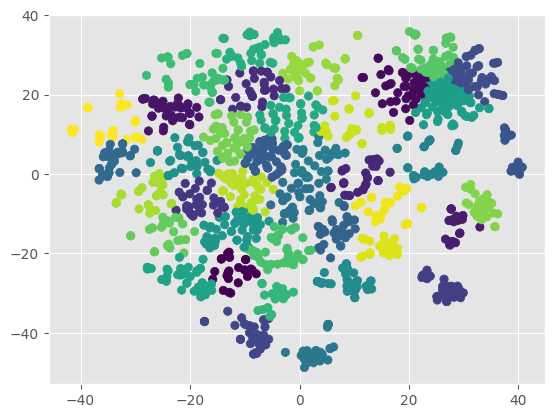

In [18]:
def clustering_visualization(X, clustering_labels):
  tsne = TSNE(random_state=0)
  X_reduced = tsne.fit_transform(X.toarray())
  kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_reduced) #clustering in the reduced space

  clustering_labels = kmeans.labels_

  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = clustering_labels)

clustering_visualization(X, clustering_labels)

/tmp/ipykernel_23462/132602576.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_labels))


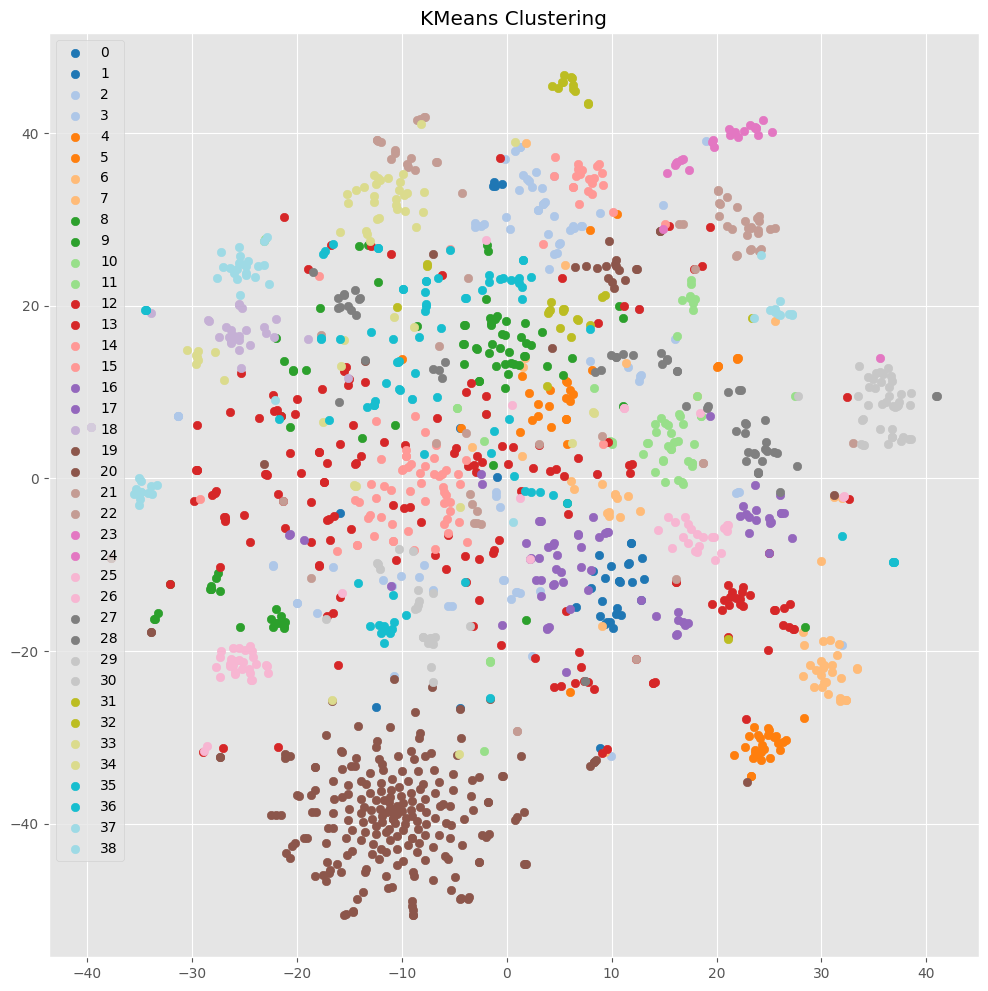

In [19]:
plt.figure(figsize = (12, 12))
tsne = TSNE(n_components=2, random_state = 0, init='random')
X_tsne = tsne.fit_transform(X[:, :])

unique_labels = np.unique(km_lab)
colors = plt.cm.get_cmap('tab20', len(unique_labels))

for i, label in enumerate(unique_labels):
    plt.scatter(X_tsne[km_lab == label, 0], X_tsne[km_lab == label, 1], color=colors(i), label=label)

plt.legend()
plt.title('KMeans Clustering')
plt.show()

In [21]:
docs_df['cluster'] = km_lab

modified_docs_df = docs_df[docs_df['subject'] != '']  # remove empty subjects' rows

cluster_df = modified_docs_df.groupby(['cluster'])['subject'].agg(lambda x: pd.Series.mode(x)[0]).to_frame().reset_index()
founded_clusters = cluster_df['cluster'].tolist()

missing_clusters = [i for i in range(n_clusters) if i not in founded_clusters]
miss_clus_subj = ['General Science'for i in range(len(missing_clusters))]
d = {'cluster': missing_clusters, 'subject': miss_clus_subj}
missing_df = pd.DataFrame(d)

cluster_df = pd.concat([cluster_df, missing_df], ignore_index=True)

empty_subject_mask = docs_df['subject'] == ''
docs_df.loc[empty_subject_mask, 'subject'] = docs_df.loc[empty_subject_mask, 'cluster'].map(cluster_df.set_index('cluster')['subject'])

docs_df

,title,subject,description,link,explanation,docno,text,cluster
0,Rainbow milk,Chemistry,Create a color explosion in milk. About polari...,https://www.experimentarchive.com/experiments/...,Milk is a mixture consisting of water and chem...,d0,Rainbow milk Chemistry Milk is a mixture consi...,35
1,Egg drop challenge,Technology,Build a landing device for an egg and then dro...,https://www.experimentarchive.com/experiments/...,Deformation is a term within physics and techn...,d1,Egg drop challenge Technology Deformation is a...,27
2,Cartesian diver,Physics,Squeeze the bottle and the matches sink. About...,https://www.experimentarchive.com/experiments/...,The head of a match is porous and contains sma...,d2,Cartesian diver Physics The head of a match is...,6
3,Drops on a coin,Chemistry,How many water drops can fit on a coin? About ...,https://www.experimentarchive.com/experiments/...,Water consists of water molecules that attract...,d3,Drops on a coin Chemistry Water consists of wa...,8
4,Homemade marble run,Physics,Build a marble run on the wall. About gravitat...,https://www.experimentarchive.com/experiments/...,"The higher up something is, the more gravitati...",d4,Homemade marble run Physics The higher up some...,27
...,...,...,...,...,...,...,...,...
1916,Build a Paper Roller Coaster,General Science,,https://www.sciencebuddies.org/stem-activities...,Have you ever ridden a roller coaster? Have yo...,d1460,Build a Paper Roller Coaster Have you ever ri...,20
1917,Electrolyte Challenge: Orange Juice Vs. Sports...,Chemistry,The makers of sports drinks spend tens to hund...,https://www.sciencebuddies.org/science-fair-pr...,"""Just do it!"" You have probably heard that slo...",d1461,Electrolyte Challenge: Orange Juice Vs. Sports...,13
1918,What Makes Ice Melt Fastest?,Chemistry,If you live in a place that gets cold in the w...,https://www.sciencebuddies.org/science-fair-pr...,If you have ever made homemade ice cream the o...,d1462,What Makes Ice Melt Fastest? Chemistry If you ...,32
1919,Do Migratory Birds Like It Hot?,Zoology,Why do birds migrate? Do all birds have the sa...,https://www.sciencebuddies.org/science-fair-pr...,Have you ever noticed that some of the bird sp...,d1463,Do Migratory Birds Like It Hot? Zoology Have y...,38
